**K MEANS**

In [1]:
!!pip install kmeans_pytorch

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting kmeans_pytorch',
 '  Downloading kmeans_pytorch-0.3-py3-none-any.whl (4.4 kB)',
 'Installing collected packages: kmeans_pytorch',
 'Successfully installed kmeans_pytorch-0.3']

In [37]:
import torch
import numpy as np
from kmeans_pytorch import kmeans_predict, kmeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import date
from scipy.stats import probplot

In [6]:
df = pd.read_csv('/content/bank_transactions.csv')

df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


# Data Wrangling

In [7]:
df.shape

(1048567, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [9]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [10]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [11]:
df[df.duplicated()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [12]:

df.drop(['TransactionID','CustomerID'],axis=1,inplace=True)

In [13]:
df['CustGender'].value_counts()

M    765530
F    281936
T         1
Name: CustGender, dtype: int64

In [14]:
df.drop(df[df['CustGender'].isin(['T'])].index,axis=0,inplace=True)

In [15]:
df['CustGender'].unique()

array(['F', 'M', nan], dtype=object)

In [16]:
df = df[~df['CustomerDOB'].isna()]
df.CustomerDOB = pd.to_datetime(df.CustomerDOB,errors='coerce')

In [20]:
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [23]:
df['Age'] = df.CustomerDOB.apply(age)

In [24]:
df = df[df['Age']>0]
df.drop('CustomerDOB',axis=1,inplace=True)
df.shape

(960885, 7)

In [25]:
for col in df.columns:
    print("Percentage of null values of {}:".format(col),str(np.round(df[col].isna().sum()/len(df)*100,2)) + '%')

Percentage of null values of CustGender: 0.09%
Percentage of null values of CustLocation: 0.02%
Percentage of null values of CustAccountBalance: 0.23%
Percentage of null values of TransactionDate: 0.0%
Percentage of null values of TransactionTime: 0.0%
Percentage of null values of TransactionAmount (INR): 0.0%
Percentage of null values of Age: 0.0%


In [26]:
for col in df.columns:
    print("Percentage of unique values of {}:".format(col),str(np.round(df[col].nunique()/len(df)*100,2)) + '%')

Percentage of unique values of CustGender: 0.0%
Percentage of unique values of CustLocation: 0.91%
Percentage of unique values of CustAccountBalance: 15.06%
Percentage of unique values of TransactionDate: 0.01%
Percentage of unique values of TransactionTime: 8.47%
Percentage of unique values of TransactionAmount (INR): 8.7%
Percentage of unique values of Age: 0.01%


In [27]:
df = df[~df['CustGender'].isna()]

In [28]:
df = df[~df['CustLocation'].isna()]

In [29]:
df.CustAccountBalance = df.CustAccountBalance.fillna(df.groupby('CustLocation')['CustAccountBalance'].transform('mean'))

In [30]:
df = df[~df.CustAccountBalance.isna()]

In [31]:
df.isna().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [32]:
df.shape

(959688, 7)

In [33]:
df.TransactionDate = pd.to_datetime(df.TransactionDate,errors='coerce')

In [34]:
df['TransactionMonth'] = df.TransactionDate.dt.month
df['TransactionMonthName'] = df.TransactionDate.dt.month_name()
df['TransactionDay'] = df.TransactionDate.dt.day
df['TransactionDayName'] = df.TransactionDate.dt.day_name()

In [35]:
df.drop('TransactionDate',axis=1,inplace=True)

Skewness of CustAccountBalance: 36.781898325340336
Kurtosis of CustAccountBalance: 2719.6433815447053
Distribution Plot of CustAccountBalance:


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


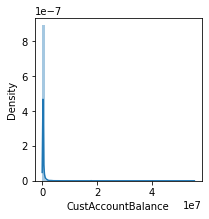

Box Plot of CustAccountBalance:


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


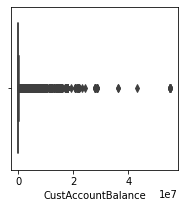

Quantile-Quantile Plot of CustAccountBalance:


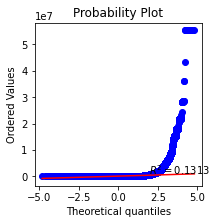

Skewness of TransactionAmount (INR): 56.972533113151364
Kurtosis of TransactionAmount (INR): 9565.222497905634
Distribution Plot of TransactionAmount (INR):


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


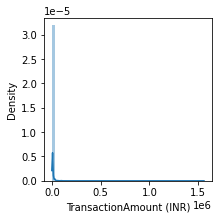

Box Plot of TransactionAmount (INR):


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


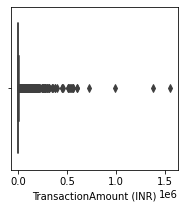

Quantile-Quantile Plot of TransactionAmount (INR):


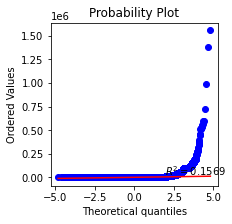

In [38]:
for col in df.columns:
    if df[col].dtypes == np.float64:
        print("Skewness of {}:".format(col),df[col].skew())
        print("Kurtosis of {}:".format(col),df[col].kurt())
        plt.figure(figsize=(3,3))
        print("Distribution Plot of {}:".format(col))
        sns.distplot(df[col])
        plt.show()
        print("Box Plot of {}:".format(col))
        plt.figure(figsize=(3,3))
        sns.boxplot(df[col])
        plt.show()
        print("Quantile-Quantile Plot of {}:".format(col))
        plt.figure(figsize=(3,3))
        probplot(df[col],plot=plt,rvalue=True)
        plt.show()

#Exploratory Data Analysis

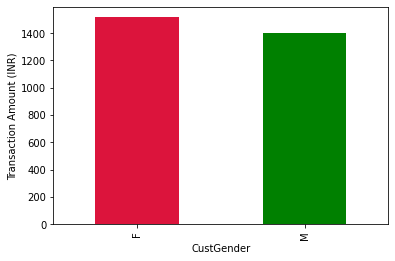

In [40]:
ax = df.groupby('CustGender')['TransactionAmount (INR)'].mean().plot(kind='bar',color=['crimson','green'])
plt.ylabel('Transaction Amount (INR)');

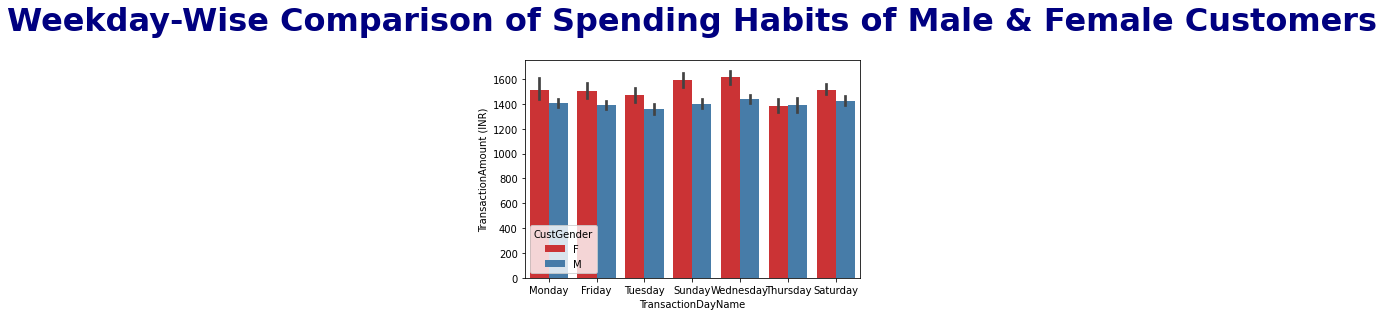

In [41]:
sns.barplot(data=df,x='TransactionDayName',y='TransactionAmount (INR)',palette='Set1',hue='CustGender')
plt.title('Weekday-Wise Comparison of Spending Habits of Male & Female Customers',fontsize=32,fontweight='bold',color='navy',pad=30);

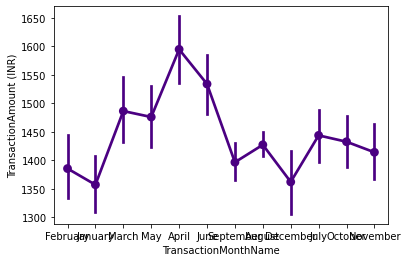

In [42]:
sns.pointplot(data=df,x='TransactionMonthName',y='TransactionAmount (INR)',color='indigo')

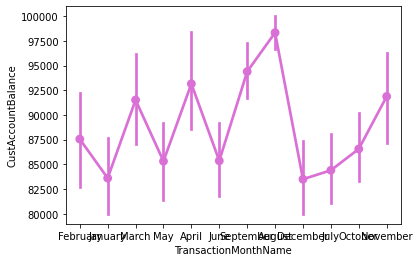

In [43]:
sns.pointplot(data=df,x='TransactionMonthName',y='CustAccountBalance',color='orchid')

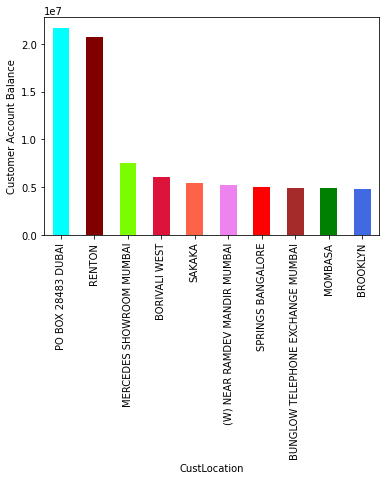

In [44]:
df.groupby('CustLocation')['CustAccountBalance'].mean().sort_values(ascending=False)[:10].plot(kind='bar',color=['aqua','maroon','lawngreen','crimson','tomato','violet','red','brown','green','royalblue'])
plt.ylabel('Customer Account Balance');

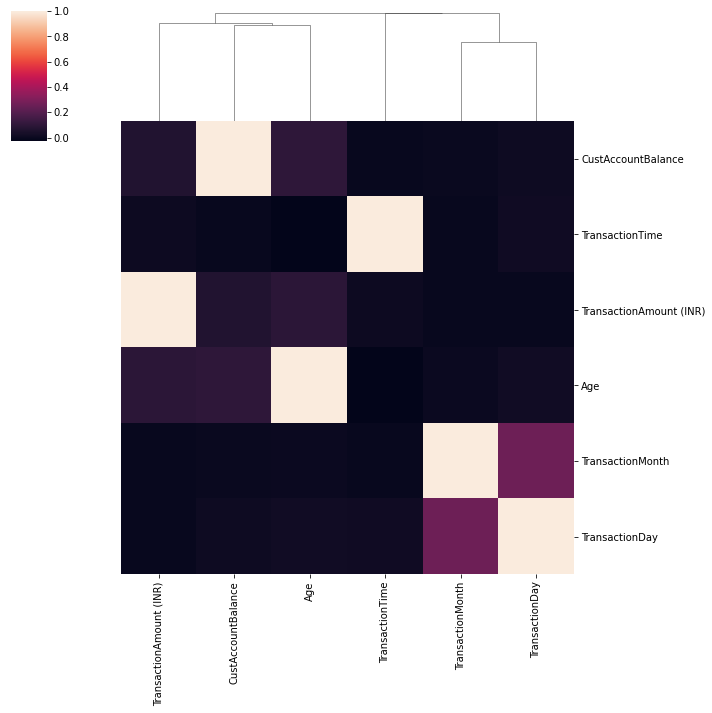

In [45]:
sns.clustermap(df.corr(),row_cluster=False)

In [46]:
df.CustGender.replace(['F','M'],[0,1],inplace=True)
df.CustGender = df.CustGender.astype(np.int64)

# Categorical Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.CustLocation = encoder.fit_transform(df.CustLocation)
df.CustLocation = df.CustLocation.astype(np.int64)

In [48]:
df.drop(['TransactionMonthName','TransactionDayName'],axis=1,inplace=True)

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonth,TransactionDay
0,-1.650102,-0.225842,-0.153031,-0.272455,-0.233311,-0.409136,-2.027732,-0.879388
1,-1.650102,0.478541,-0.152918,-0.282049,-0.161371,-0.454059,-2.027732,-0.879388
2,-1.650102,0.478541,1.576735,-0.282011,0.104013,0.062562,-2.027732,-0.879388
3,-1.650102,0.641746,-0.175665,0.463052,0.054699,-0.274365,-2.027732,-0.879388
4,-1.650102,0.478541,-0.187366,0.320598,-0.143635,-0.341750,-2.027732,-0.879388


# PCA

In [53]:
from sklearn.decomposition import PCA
temp = scaled_df.sample(10000)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(temp)
pca_components = pd.DataFrame(pca_components,columns=['PC1','PC2'])
pca_components.head()

,PC1,PC2
0,1.108534,-0.022553
1,1.486630,-0.595274
2,0.059902,-1.728342
3,0.673222,0.018408
4,0.281984,-2.223423


In [62]:
data_size, dims, num_clusters = 10000, 2, 8
x = torch.from_numpy(df.to_numpy()) 

In [63]:
cluster_ids_x, cluster_centers = kmeans(X=x,num_clusters=num_clusters,distance='euclidean',
device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))

running k-means on cuda..


[running kmeans]: 161it [01:24,  1.90it/s, center_shift=0.000000, iteration=161, tol=0.000100]


In [64]:
cluster_ids_x

tensor([0, 0, 2,  ..., 4, 3, 3])

In [66]:
num_clusters

8

In [65]:
cluster_centers

tensor([[7.5430e-01, 3.8576e+03, 2.6185e+04, 1.0440e+05, 1.1656e+03, 4.5360e+01,
         7.3501e+00, 1.4234e+01, 1.0000e+00],
        [8.5868e-01, 3.6036e+03, 7.6892e+06, 1.5550e+05, 6.3296e+03, 6.7476e+01,
         7.1767e+00, 1.4831e+01, 0.0000e+00],
        [7.2317e-01, 3.8893e+03, 8.8917e+05, 1.5802e+05, 3.5040e+03, 6.8870e+01,
         7.4471e+00, 1.5049e+01, 1.0000e+00],
        [7.2030e-01, 3.8506e+03, 2.7007e+04, 1.9139e+05, 1.2966e+03, 4.3341e+01,
         7.3323e+00, 1.4433e+01, 1.0000e+00],
        [6.9490e-01, 3.9355e+03, 3.0752e+05, 1.5858e+05, 2.8537e+03, 6.1217e+01,
         7.4131e+00, 1.4894e+01, 1.0000e+00],
        [7.8574e-01, 3.9319e+03, 1.9485e+06, 1.5468e+05, 4.1058e+03, 8.7924e+01,
         7.4126e+00, 1.4912e+01, 1.0000e+00],
        [8.8179e-01, 4.0837e+03, 4.1543e+06, 1.5717e+05, 5.2263e+03, 9.1652e+01,
         7.3940e+00, 1.5245e+01, 5.6922e-01],
        [7.7154e-01, 3.9700e+03, 1.9136e+07, 1.5618e+05, 6.7304e+03, 1.2283e+02,
         7.2210e+00, 1.4566e+0

In [60]:
clus_data = df
clus_data['clusters'] = cluster_ids_x

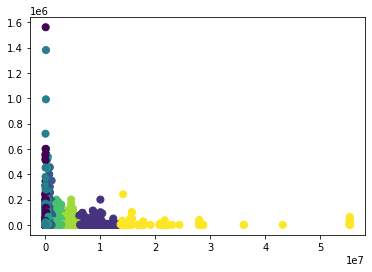

In [67]:
plt.scatter(df["CustAccountBalance"], df["TransactionAmount (INR)"], c=cluster_ids_x, s=50, cmap='viridis')